<a href="https://colab.research.google.com/github/motazsaad/infant-cry-care/blob/main/FastApiCryCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import librosa 
import matplotlib.pyplot as plt
import numpy as np
from pydantic import BaseModel
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn
from fastapi.encoders import jsonable_encoder
from fastapi.responses import JSONResponse
classes=['Hungry','Sleepy','Uncomfortable','asphyxia','burp up','lower gas','normal','pain']
mainPath = '/content/drive/MyDrive/CryCareDataset/'
exp4Path = mainPath + 'generatedData/Exp4/'
filename = mainPath + 'cnn.sav'
cnn = pickle.load(open(filename, 'rb'))


In [ ]:
app = FastAPI()
class Item(BaseModel):
    path: str

@app.post('/predictAudio')
async def predictAudio(item: Item):
  
  audio = item.path
  audiofile, sr = librosa.load(audio, sr = 11025, mono = True)
  plt.specgram(audiofile, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='CMRmap', sides='default', mode='default', scale='dB');
  plt.axis('off');
  name = audio.split('/')[-1]
  filaname = f'{mainPath}predictedImage/{name[:-3].replace(".", "")}.png'
  plt.savefig(filaname)

  my_image = load_img(filaname, target_size=(256, 256))
  my_image = img_to_array(my_image)
  my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
  # my_image = preprocess_input(my_image)

  y = cnn.predict(my_image)
  predicted_class = np.argmax(np.round(y),axis=1)[0]
  return {
      "label" : classes[predicted_class]
      }

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: http://5e0e-35-237-179-143.ngrok.io


INFO:     Started server process [72]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     158.140.109.127:0 - "POST /predictAudio HTTP/1.1" 200 OK


Streaming output truncated to the last 5000 lines.
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <Context object at 0x7f8675a3cd20> is already entered
Exception in callback BaseAsyncIOLoop._handle_events(17, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(17, 1)>
Traceback (most recent call last):
  File "/usr/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <Context object at 0x7f8675a3cd20> is already entered
Exception in callback BaseAsyncIOLoop._handle_events(17, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(17, 1)>
Traceback (most recent call last):
  File "/usr/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <Context object at 0x7f8675a3cd20> is already entered
Exception in callback BaseAsyncIOLoop._handle_events(17, 1)
handle: <Handle BaseAsyncIOLoop._handl

array([[0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

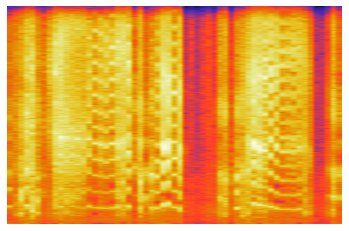

In [ ]:
def predictAudio(item):
  
  audio = item
  audiofile, sr = librosa.load(audio, sr = 11025, mono = True)
  plt.specgram(audiofile, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='CMRmap', sides='default', mode='default', scale='dB');
  plt.axis('off');
  name = audio.split('/')[-1]
  filaname = f'{mainPath}predictedImage/{name[:-3].replace(".", "")}.png'
  plt.savefig(filaname)

  my_image = load_img(filaname, target_size=(256, 256))
  my_image = img_to_array(my_image)
  my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
  my_image = preprocess_input(my_image)

  y = cnn2.predict(my_image)
  predicted_class = np.argmax(np.round(y),axis=1)[0]
  # return predicted_class
  return cnn2.predict(my_image)
y = predictAudio(mainPath + '3.wav')
y

In [ ]:
from math import exp

for i in y[0]:
  print((i))
# exp(1)

0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
